# Logistic Regression — Training Loop (End-to-End)

This notebook integrates all components built so far:
- Linear score
- Sigmoid probability mapping
- Log Loss objective
- Gradient Descent optimization

The result is a complete **binary classification system**
trained from scratch.


## What Training Means in Classification

Training a classifier means:
- shaping probabilities, not just labels
- moving a decision boundary through feature space
- minimizing log loss, not maximizing accuracy

Accuracy is a *diagnostic metric*.
Log loss is the *learning signal*.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


## Dataset

A 2D dataset is used so that:
- decision boundaries are visible
- geometric learning can be verified visually


In [2]:
n_samples = 200

X0 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
y0 = np.zeros(n_samples // 2)

X1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
y1 = np.ones(n_samples // 2)

X = np.vstack([X0, X1])
y = np.hstack([y0, y1])


## Model Components Recap

Logistic regression consists of:
1. Linear score: $z = Xw + b$
2. Sigmoid: converts score to probability
3. Log Loss: evaluates confidence correctness
4. Gradient Descent: updates parameters

These components now operate as a single system.


In [3]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))


In [4]:
def log_loss(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(
        y_true * np.log(y_pred) +
        (1 - y_true) * np.log(1 - y_pred)
    )


## Training Loop (Batch Gradient Descent)

At each iteration:
1. Compute probabilities
2. Evaluate log loss
3. Compute gradients
4. Update parameters

Due to the sigmoid–log-loss pairing,
the gradient simplifies to:

$$
\nabla_w J = \frac{1}{n} X^T (\hat{y} - y)
$$


In [5]:
w = np.zeros(X.shape[1])
b = 0.0

learning_rate = 0.1
epochs = 300

loss_history = []
accuracy_history = []


In [6]:
for epoch in range(epochs):
    z = X @ w + b
    y_hat = sigmoid(z)

    loss = log_loss(y, y_hat)
    loss_history.append(loss)

    y_pred = (y_hat >= 0.5).astype(int)
    accuracy_history.append(np.mean(y_pred == y))

    n = len(y)
    dw = (1 / n) * X.T @ (y_hat - y)
    db = (1 / n) * np.sum(y_hat - y)

    w -= learning_rate * dw
    b -= learning_rate * db


## Decision Boundary Geometry

The decision boundary is defined by:

$$
Xw + b = 0
$$

Points on this line satisfy:
$$
P(y=1|X) = 0.5
$$


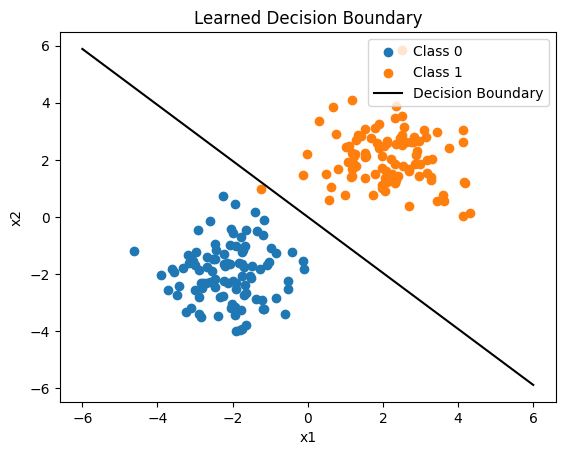

In [7]:
x_vals = np.linspace(-6, 6, 200)
y_vals = -(w[0] * x_vals + b) / w[1]

plt.scatter(X0[:, 0], X0[:, 1], label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], label="Class 1")
plt.plot(x_vals, y_vals, color="black", label="Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Learned Decision Boundary")
plt.show()


## Loss vs Iteration

Log loss continues to decrease even after accuracy saturates.
This reflects increasing **confidence**, not changing labels.


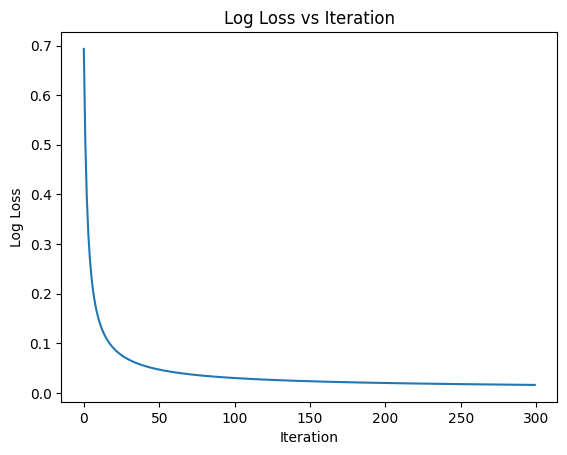

In [8]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.title("Log Loss vs Iteration")
plt.show()


## Accuracy vs Iteration

Accuracy is discrete.
It often plateaus early, even while learning continues.


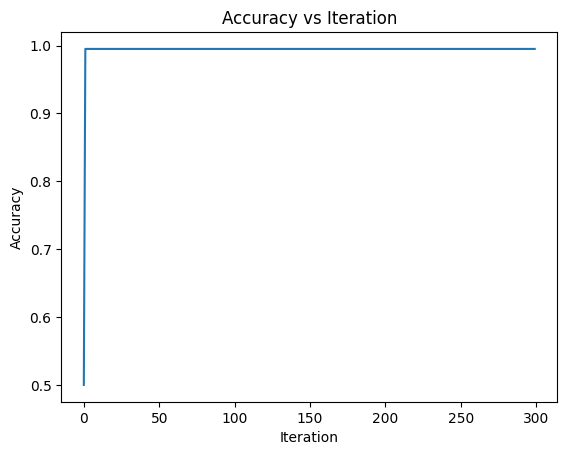

In [9]:
plt.plot(accuracy_history)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iteration")
plt.show()


## Convergence & Loss Plateaus

A flat accuracy curve does not imply training has stopped.

Loss may continue decreasing because:
- probabilities are moving closer to 0 or 1
- the model is becoming more confident
- gradients shrink naturally near convergence

Loss — not accuracy — determines convergence.


## Summary

- Logistic regression training integrates geometry, probability, and optimization
- Log loss shapes disciplined confidence
- Decision boundaries emerge from gradient descent
- Accuracy evaluates; loss teaches

This completes classification training end-to-end.
